In [2]:
# data manipulation
import numpy as np
import pandas as pd 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

## **2. Data Understanding**<hr>

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **1.1 Descriptive statistics**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see the Age,Cabin and Embarked columns have null columns

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Let's deal with age
train["Age"] = train["Age"].fillna(train["Age"].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now let's deal with embarked

In [9]:
# Let's look at the values in embarked
train["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# Lets fill in with the mode
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [11]:
#We will drop cabin for now
train = train.drop(columns=["Cabin"], axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [84]:
# Dropping duplicates
train.drop_duplicates(inplace=True)

### **1.2 Data Visualization And Analysis**

Let's look at each column

* Pclass

<Axes: xlabel='Pclass', ylabel='Count'>

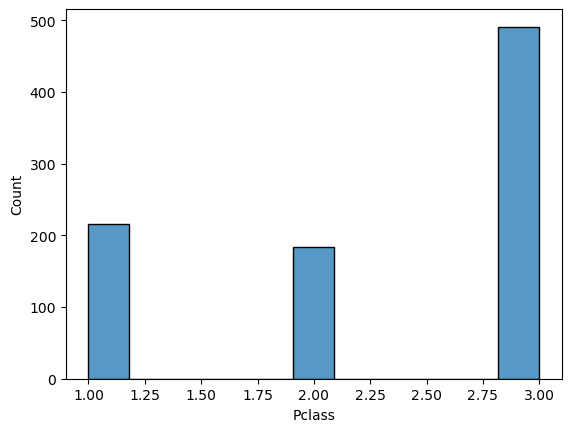

In [13]:
sns.histplot(train,x="Pclass")

<Axes: xlabel='Survived', ylabel='Sex'>

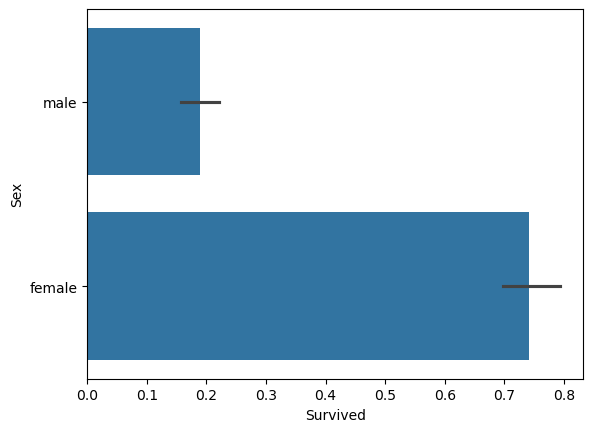

In [21]:
# TODO = Draw a meaningful chart 
sns.barplot(data=train, y="Sex", x="Survived")

<Axes: title={'center': "Barchart of mean age of those who survived vs those who didn't"}, xlabel='Survived', ylabel='Mean Age'>

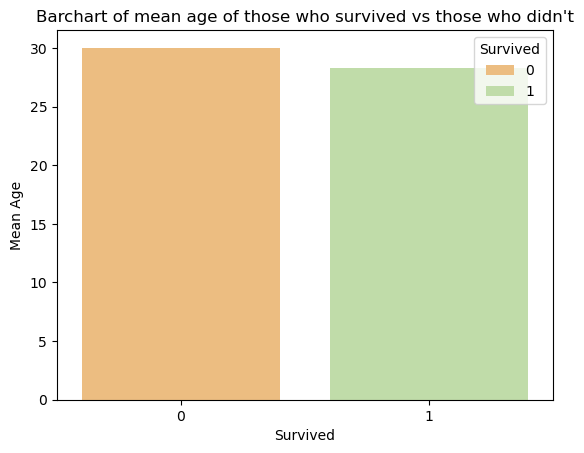

In [43]:
chartX = train.groupby("Survived")["Age"].mean()
title = "Barchart of mean age of those who survived vs those who didn't"
y_label = "Mean Age"
plt.title(title)
plt.ylabel(y_label)
sns.barplot(x=chartX.index, y=chartX.values, hue=chartX.index, palette="Spectral")

In [53]:
chartX = train.groupby("Sex")["Survived"].mean()
chartX

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: title={'center': 'Barchart of the proportion of those who survived vs those who dont'}, xlabel='Sex', ylabel='Percentage of the gender that survived in %'>

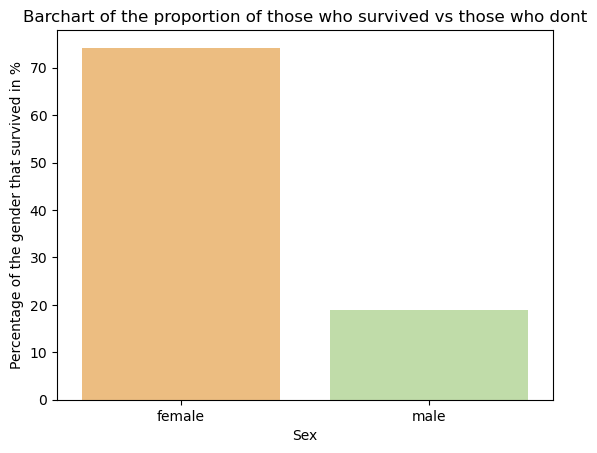

In [55]:
title = "Barchart of the proportion of those who survived vs those who dont"
y_label = "Percentage of the gender that survived in %"
plt.title(title)
plt.ylabel(y_label)
sns.barplot(x=chartX.index, y= chartX.values * 100, hue=chartX.index, palette="Spectral")

In [58]:
chartX = train.groupby(["Survived", "Sex"])["Age"].mean()
chartX

Survived  Sex   
0         female    25.666667
          male      30.783120
1         female    28.716738
          male      27.382294
Name: Age, dtype: float64

<Figure size 640x480 with 0 Axes>

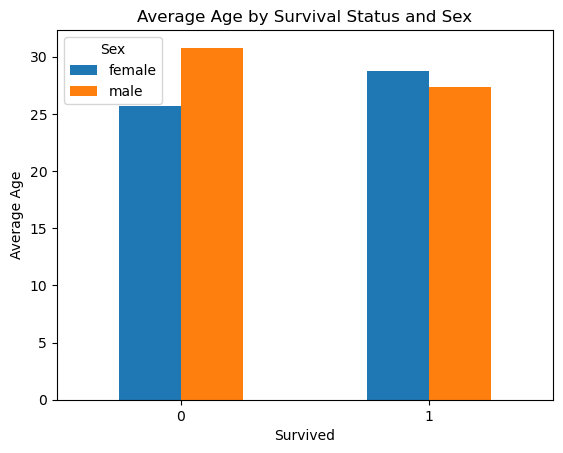

In [65]:
# Converts the above output into a DataFrame
table = chartX.unstack()

#plotting it 
plt.figure()
table.plot(kind="bar")

plt.xlabel("Survived")
plt.ylabel("Average Age")
plt.title("Average Age by Survival Status and Sex")
plt.xticks(rotation=0)

plt.show()

* 74% of females survived compared to 18%

In [ ]:
chartX = train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

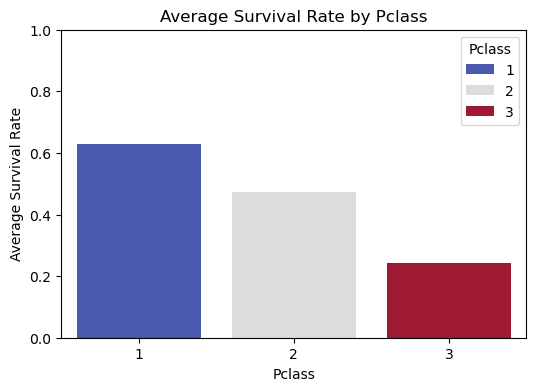

In [83]:
chartX = train.groupby("Pclass")["Survived"].mean()
chart_df = chartX.reset_index() 
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=chart_df, palette="coolwarm")
plt.title("Average Survival Rate by Pclass")
plt.ylabel("Average Survival Rate")
plt.ylim(0, 1)
plt.show()

We can see that 1st class passengers were likely to survive. Maybe it's because they were better equipped with emergency kits and tools.

## **3.Data Preparation**<hr>

## **4. Modelling**<hr>

# **5. Evaluate**<hr>